In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data=pd.read_csv("Churn_Modelling.csv")

In [28]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
df_numeric=data[['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
df_categorical=data[['Geography','Gender','HasCrCard','IsActiveMember','Exited']]
df_numeric.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,101348.88
1,2,15647311,608,41,1,83807.86,1,112542.58
2,3,15619304,502,42,8,159660.80,3,113931.57
3,4,15701354,699,39,1,0.00,2,93826.63
4,5,15737888,850,43,2,125510.82,1,79084.10


In [37]:
df_categorical.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [39]:
print(data['Gender'].unique())
print(data['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


In [41]:
from sklearn.preprocessing import LabelEncoder
Gender_encoder = LabelEncoder()
Gender_encoder.fit(df_categorical['Gender'])
Gender_values = Gender_encoder.transform(df_categorical['Gender'])
print("Before Encoding:", list(df_categorical['Gender'][-10:]))
print("After Encoding:", Gender_values[-10:])
print("The inverse from the encoding result:", Gender_encoder.inverse_transform(Gender_values[-10:]))

Before Encoding: ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female']
After Encoding: [1 0 1 1 0 1 1 0 1 0]
The inverse from the encoding result: ['Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female']


In [45]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [46]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [49]:
response = data["Exited"]
dataset = data.drop(columns="Exited")

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 13)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 13)
Number transactions y_test dataset:  (2000,)


In [59]:
X=data[['CreditScore','Tenure']]
y=data['Exited']

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = sc.transform(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


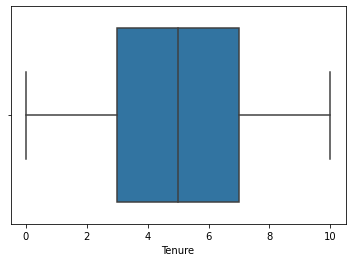

In [65]:
sns.boxplot(data['Tenure'],data=data)

In [66]:
Q1 = data['Tenure'].quantile(0.10)
Q3 = data['Tenure'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=data['Tenure'][(data['Tenure']>upper_whisker)|(data['Tenure']<lower_whisker)].index
data.drop(index,inplace=True)

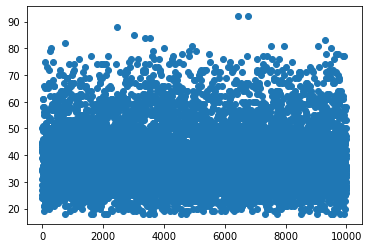

In [70]:
plt.scatter(data.index,data['Age'])
plt.show()

Text(0, 0.5, 'Balance')

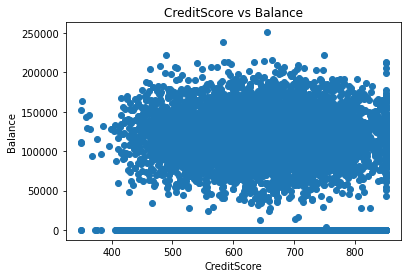

In [73]:
plt.scatter(data.CreditScore, data.Balance)
plt.title('CreditScore vs Balance')
plt.xlabel('CreditScore')
plt.ylabel('Balance')

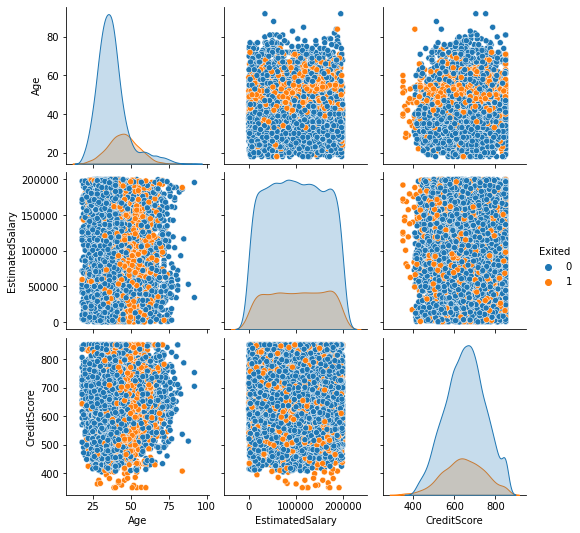

In [82]:
sns.pairplot(data[['Age','EstimatedSalary','CreditScore','Exited']],hue='Exited')